In [1]:
import os
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
twitter_users = ["nytimes", "BBCNews", "CBSNews", "CNN", "FoxNews"]
api = tweepy.API(auth)
tweets = []
for user in twitter_users:
    for tweet in tweepy.Cursor(api.user_timeline, user, tweet_mode='extended').items(100):
        tweets.append(tweet)
        time.sleep(0.5)
tweets


[Status(_api=<tweepy.api.API object at 0x1075e4a10>, _json={'created_at': 'Wed May 20 22:00:06 +0000 2020', 'id': 1263228028550885385, 'id_str': '1263228028550885385', 'full_text': 'The Globe, a full-scale replica of Shakespeare’s original 1599 open-air theater, is just one of many cultural institutions facing an uncertain future because of the pandemic\nhttps://t.co/6qe93lcqlQ', 'truncated': False, 'display_text_range': [0, 197], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/6qe93lcqlQ', 'expanded_url': 'https://nyti.ms/2Xeyfr7', 'display_url': 'nyti.ms/2Xeyfr7', 'indices': [174, 197]}]}, 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 807095, 'id_str': '807095', 'name': 'The New York Times', 'screen_name': 'nytimes', 'location': 'N

In [6]:
#for tweet in tweets:
    #accounts = []
    #times = []
    #text = []
    #Account = tweets[0]._json["user"]['name']
    #Time = tweets[0]._json['created_at']
    #Tweet = tweets[0]._json['full_text']
    #accounts.append(Account)
    #times.append(Time)
    #text.append(Tweet)
#print(accounts)
#print(times)
#print(text)
accounts = []
times = []
text = []

for tweet in tweets:
    times.append(tweet.created_at)
    text.append(tweet.full_text)
    accounts.append(tweet.user.name)

In [7]:
tweets_df = pd.DataFrame({
    'Account': accounts,
    'Tweet Time': times,
    'Tweet Text': text   
    })

In [8]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
tweets_df

Account          Tweet Time  \
0    The New York Times 2020-05-20 22:00:06   
1    The New York Times 2020-05-20 21:44:02   
2    The New York Times 2020-05-20 21:43:00   
3    The New York Times 2020-05-20 21:42:10   
4    The New York Times 2020-05-20 21:41:00   
..                  ...                 ...   
495  Fox News           2020-05-12 01:36:35   
496  Fox News           2020-05-12 00:32:07   
497  Fox News           2020-05-11 23:18:46   
498  Fox News           2020-05-11 21:34:31   
499  Fox News           2020-05-11 20:25:16   

                                                                                                                                                                                                                                                                                  Tweet Text  
0    The Globe, a full-scale replica of Shakespeare’s original 1599 open-air theater, is just one of many cultural institutions facing an uncertain future because of the pandemic\nhttps://t.co/6qe93lcqlQ                                                                                   
1    The false information continues to spread online, raising questions about how it might damage trust in the medical community and color people’s views on a coronavirus vaccine. Read more on how the video spread — even after it was debunked and discredited. https://t.co/kBEtf5CAri  
2    The video spread widely among Facebook Groups. But the false information was also spread by a well-known doctor, a popular mixed martial arts fighter, mainstream political voices and the right-wing conspiracy group QAnon. https://t.co/kBEtf5CAri                                    
3    The discredited video has been liked, commented on or shared nearly 2.5 million times on Facebook, according to our analysis of CrowdTangle data. Here's how the video compares to other recent online events. https://t.co/kBEtf5CAri https://t.co/02YsdzD2kL                           
4    Here's how the slickly produced and discredited 26-minute video went from a niche conspiracy video to a mainstream phenomenon. https://t.co/kBEtf5CAri https://t.co/ahT1AWkm2R                                                                                                           
..                                                                                                                                                                              ...                                                                                                           
495  https://t.co/URYC8sMLyr                                                                                                                                                                                                                                                                  
496  https://t.co/fm2pOOX35f                                                                                                                                                                                                                                                                  
497  https://t.co/OeFKx015sD                                                                                                                                                                                                                                                                  
498  https://t.co/E0XAqsYJ0n                                                                                                                                                                                                                                                                  
499  https://t.co/ZvmRx0byXy                                                                                                                                                                                                                                                                  

[500 r

In [9]:
tweets_fox = tweets_df.loc[tweets_df["Account"] == "Fox News"]
for index, row in tweets_fox.iterrows():
    r = requests.get(row['Tweet Text'])
    headline_index = r.text.index('<h1 class="headline">')+21
    start_headline = r.text[headline_index:]
    end_index = start_headline.index('</h1>')
    tweets_df.iloc[index, 2] = r.text[headline_index:end_index+headline_index]

In [10]:
tweets_df

Account          Tweet Time  \
0    The New York Times 2020-05-20 22:00:06   
1    The New York Times 2020-05-20 21:44:02   
2    The New York Times 2020-05-20 21:43:00   
3    The New York Times 2020-05-20 21:42:10   
4    The New York Times 2020-05-20 21:41:00   
..                  ...                 ...   
495  Fox News           2020-05-12 01:36:35   
496  Fox News           2020-05-12 00:32:07   
497  Fox News           2020-05-11 23:18:46   
498  Fox News           2020-05-11 21:34:31   
499  Fox News           2020-05-11 20:25:16   

                                                                                                                                                                                                                                                                                  Tweet Text  
0    The Globe, a full-scale replica of Shakespeare’s original 1599 open-air theater, is just one of many cultural institutions facing an uncertain future because of the pandemic\nhttps://t.co/6qe93lcqlQ                                                                                   
1    The false information continues to spread online, raising questions about how it might damage trust in the medical community and color people’s views on a coronavirus vaccine. Read more on how the video spread — even after it was debunked and discredited. https://t.co/kBEtf5CAri  
2    The video spread widely among Facebook Groups. But the false information was also spread by a well-known doctor, a popular mixed martial arts fighter, mainstream political voices and the right-wing conspiracy group QAnon. https://t.co/kBEtf5CAri                                    
3    The discredited video has been liked, commented on or shared nearly 2.5 million times on Facebook, according to our analysis of CrowdTangle data. Here's how the video compares to other recent online events. https://t.co/kBEtf5CAri https://t.co/02YsdzD2kL                           
4    Here's how the slickly produced and discredited 26-minute video went from a niche conspiracy video to a mainstream phenomenon. https://t.co/kBEtf5CAri https://t.co/ahT1AWkm2R                                                                                                           
..                                                                                                                                                                              ...                                                                                                           
495  Hospitals treating coronavirus patients in Mexico City are reaching maximum capacity: report                                                                                                                                                                                             
496  Some Americans escaped to vacation spots as coronavirus spread -- but now they're stuck                                                                                                                                                                                                  
497  Elon Musk reopens Tesla factory closed by coronavirus: 'If anyone is arrested, I ask that it only be me'                                                                                                                                                                                 
498  MLB owners approve plan to start coronavirus-delayed 2020 season: report                                                                                                                                                                                                                 
499  Florida city closes beaches a week after reopening due to visitors defying coronavirus social distancing                                                                                                                                                                                 

[500 r

In [11]:
compound_sentiment = []
positive_sentiment = []
neutral_sentiment = []
negative_sentiment = []

for text in tweets_df["Tweet Text"]:
    target_string = text
    results = analyzer.polarity_scores(target_string)
    results

    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
    compound_sentiment.append(compound)
    positive_sentiment.append(pos)
    neutral_sentiment.append(neu)
    negative_sentiment.append(neg)

In [12]:
print(compound_sentiment)
print(positive_sentiment)
print(neutral_sentiment)
print(negative_sentiment)

[0.0258, -0.4215, 0.0, 0.3182, -0.743, -0.2382, -0.6457, -0.1531, -0.2846, 0.0258, -0.4497, 0.3612, 0.0, -0.7351, 0.7351, 0.0, 0.8777, 0.4215, 0.2382, -0.2732, -0.765, -0.1045, 0.7839, 0.0, -0.5719, 0.7902, 0.0, 0.0, -0.7184, 0.0, -0.1796, 0.7466, -0.128, 0.6243, -0.6486, -0.5859, 0.7351, -0.1263, -0.5994, 0.25, -0.0516, 0.4019, 0.6956, 0.0, 0.3455, 0.34, 0.0, -0.25, -0.3818, 0.0335, 0.0, -0.25, -0.8274, -0.9423, -0.9001, -0.9153, 0.0, -0.6249, 0.5267, 0.0, 0.7845, 0.2263, -0.0772, -0.1725, 0.0, 0.5267, 0.5782, -0.802, 0.0, 0.0, 0.8779, 0.6705, 0.2263, 0.0, -0.1027, 0.5719, 0.0, -0.7964, -0.7096, 0.8687, -0.4215, -0.4404, 0.0772, 0.5859, 0.0, -0.4019, -0.5719, 0.0, 0.0, 0.0, -0.7351, 0.0772, -0.5106, -0.7184, 0.0, 0.4767, 0.0, -0.34, -0.5994, 0.1189, 0.0, 0.5423, 0.4939, -0.7717, 0.4404, -0.0258, -0.0772, 0.0, 0.4497, 0.6486, 0.4019, -0.4404, -0.5719, 0.0, 0.0, 0.0, 0.3182, 0.8591, 0.0, -0.5574, 0.5994, -0.4939, 0.4019, 0.4019, 0.0, -0.7003, 0.0, -0.2732, 0.25, 0.6597, 0.5927, 0.0, 0.8

In [13]:
tweets_df["Compound Sentiment"] = compound_sentiment
tweets_df["Positive Sentiment"] = positive_sentiment
tweets_df["Neutral Sentiment"] = neutral_sentiment
tweets_df["Negative Sentiment"] = negative_sentiment

In [14]:
tweets_df

Account          Tweet Time  \
0    The New York Times 2020-05-20 22:00:06   
1    The New York Times 2020-05-20 21:44:02   
2    The New York Times 2020-05-20 21:43:00   
3    The New York Times 2020-05-20 21:42:10   
4    The New York Times 2020-05-20 21:41:00   
..                  ...                 ...   
495  Fox News           2020-05-12 01:36:35   
496  Fox News           2020-05-12 00:32:07   
497  Fox News           2020-05-11 23:18:46   
498  Fox News           2020-05-11 21:34:31   
499  Fox News           2020-05-11 20:25:16   

                                                                                                                                                                                                                                                                                  Tweet Text  \
0    The Globe, a full-scale replica of Shakespeare’s original 1599 open-air theater, is just one of many cultural institutions facing an uncertain future because of the pandemic\nhttps://t.co/6qe93lcqlQ                                                                                    
1    The false information continues to spread online, raising questions about how it might damage trust in the medical community and color people’s views on a coronavirus vaccine. Read more on how the video spread — even after it was debunked and discredited. https://t.co/kBEtf5CAri   
2    The video spread widely among Facebook Groups. But the false information was also spread by a well-known doctor, a popular mixed martial arts fighter, mainstream political voices and the right-wing conspiracy group QAnon. https://t.co/kBEtf5CAri                                     
3    The discredited video has been liked, commented on or shared nearly 2.5 million times on Facebook, according to our analysis of CrowdTangle data. Here's how the video compares to other recent online events. https://t.co/kBEtf5CAri https://t.co/02YsdzD2kL                            
4    Here's how the slickly produced and discredited 26-minute video went from a niche conspiracy video to a mainstream phenomenon. https://t.co/kBEtf5CAri https://t.co/ahT1AWkm2R                                                                                                            
..                                                                                                                                                                              ...                                                                                                            
495  Hospitals treating coronavirus patients in Mexico City are reaching maximum capacity: report                                                                                                                                                                                              
496  Some Americans escaped to vacation spots as coronavirus spread -- but now they're stuck                                                                                                                                                                                                   
497  Elon Musk reopens Tesla factory closed by coronavirus: 'If anyone is arrested, I ask that it only be me'                                                                                                                                                                                  
498  MLB owners approve plan to start coronavirus-delayed 2020 season: report                                                                                                                                                                                                                  
499  Florida city closes beaches a week after reopening due to visitors defying coronavirus social distancing                                                                                                                                                                              

In [15]:
tweets_df.to_csv("Tweets_Sentiment.csv")

In [16]:
tweets_nyt = tweets_df.loc[tweets_df["Account"] == "The New York Times"]
tweets_bbc = tweets_df.loc[tweets_df["Account"] == "BBC News (UK)"]
tweets_cbs = tweets_df.loc[tweets_df["Account"] == "CBS News"]
tweets_cnn = tweets_df.loc[tweets_df["Account"] == "CNN"]
tweets_fox = tweets_df.loc[tweets_df["Account"] == "Fox News"]

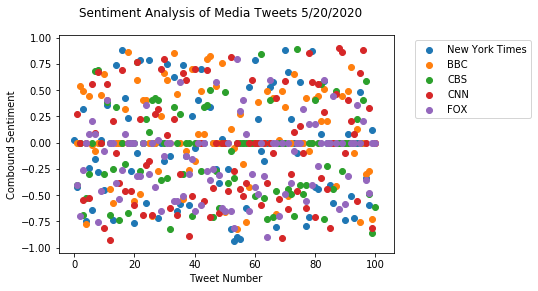

In [17]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
fig.suptitle('Sentiment Analysis of Media Tweets 5/20/2020')

ax1.scatter(tweets_nyt.index,tweets_nyt["Compound Sentiment"])
ax1.scatter(tweets_bbc.index-99, tweets_bbc["Compound Sentiment"])
ax1.scatter(tweets_cbs.index-199, tweets_cbs["Compound Sentiment"])
ax1.scatter(tweets_cnn.index-299, tweets_cnn["Compound Sentiment"])
ax1.scatter(tweets_fox.index-399, tweets_fox["Compound Sentiment"])

labels = ["New York Times", "BBC", "CBS", "CNN", "FOX"]
ax1.set(xlabel='Tweet Number', ylabel='Combound Sentiment')
plt.legend(bbox_to_anchor=(1.05, 1), labels = labels)
plt.savefig("../Images/Sentiment_Analysis_Scatter", bbox_inches='tight')
plt.show()

In [18]:
tweets_group = tweets_df.groupby("Account").mean()["Compound Sentiment"]
tweets_group

Account
BBC News (UK)         0.080951
CBS News             -0.082214
CNN                  -0.036786
Fox News             -0.148523
The New York Times   -0.049710
Name: Compound Sentiment, dtype: float64

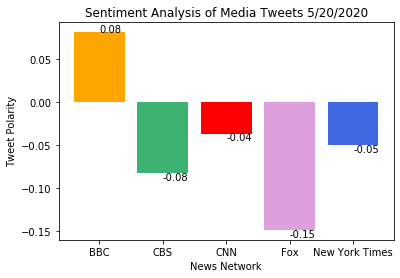

In [32]:
tweets_users_graph = ["BBC", "CBS", "CNN", "Fox", "New York Times"]
plt.bar(tweets_users_graph, tweets_group, color=['orange', 'mediumseagreen', 'red', 'plum', 'royalblue'])
for index, value in enumerate(tweets_group):
    plt.text(index, value if value>0 else value-.008, str(round(value,2)))
plt.xlabel("News Network")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets 5/20/2020")
plt.savefig("../Images/Sentiment_Analysis_Bar")

## Observations
* It appears on this day Fox News had the most negative average sentiment. This coincides with the scatter plot in which most of the dots representing fox news fall below 0 on the sentiment scale.
* In the scatterplot there seem to be more tweets at or below zero across all news platforms studeied. This is again shown in the bar chart as all but one news organization had a negative overal sentiment.
* Three of the news sources had average sentiments between -.01 and .01 implying that they had a similar number of tweets with little sentiment or equal positive/negative sentiment overall. 